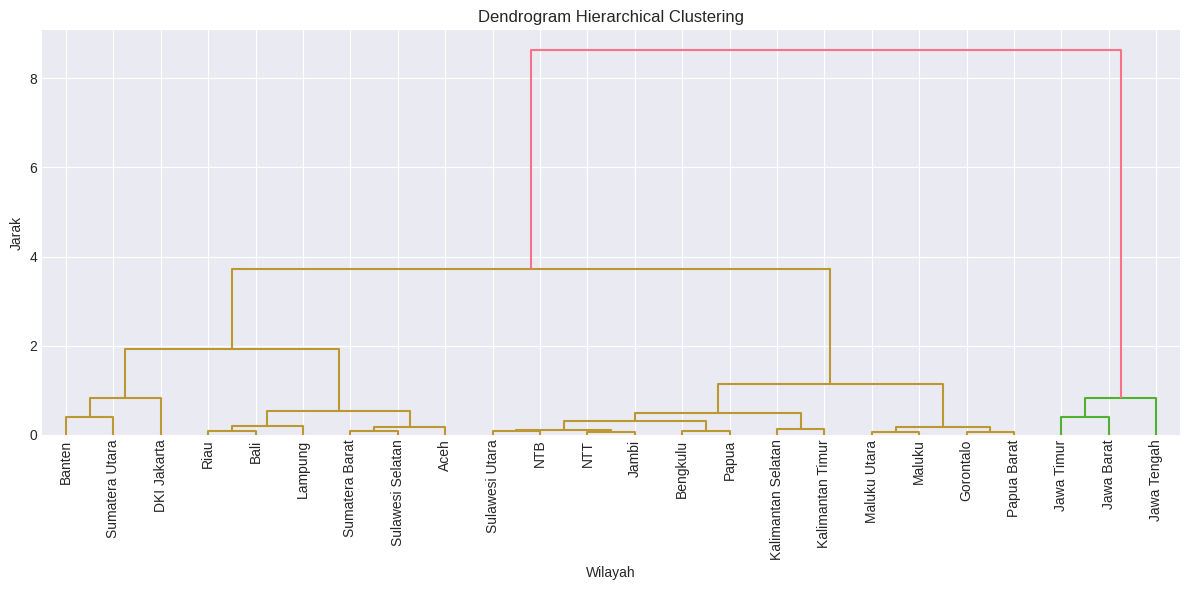

EVALUASI HIERARCHICAL CLUSTERING
Silhouette Score : 0.599
Davies-Bouldin Index : 0.460

Ringkasan Statistik per Cluster:

| cluster          | wilayah   | pendidik_avg   | sekolah_avg   | rasio_avg   |
|:-----------------|:----------|:---------------|:--------------|:------------|
| Kepadatan Sedang | 9         | 8944.44        | 323.33        | 27.13       |
| Kepadatan Tinggi | 3         | 22666.7        | 800           | 28.28       |
| Kepadatan Rendah | 12        | 3500           | 156.67        | 21.95       |

Wilayah dalam setiap Cluster:
  • Cluster 0 (Kepadatan Sedang): DKI Jakarta, Sumatera Utara, Banten, Sulawesi Selatan, Bali, Lampung, Riau, Aceh, Sumatera Barat
  • Cluster 1 (Kepadatan Tinggi): Jawa Barat, Jawa Tengah, Jawa Timur
  • Cluster 2 (Kepadatan Rendah): Kalimantan Timur, Papua, Maluku, NTB, Sulawesi Utara, Kalimantan Selatan, Jambi, Bengkulu, NTT, Papua Barat, Gorontalo, Maluku Utara


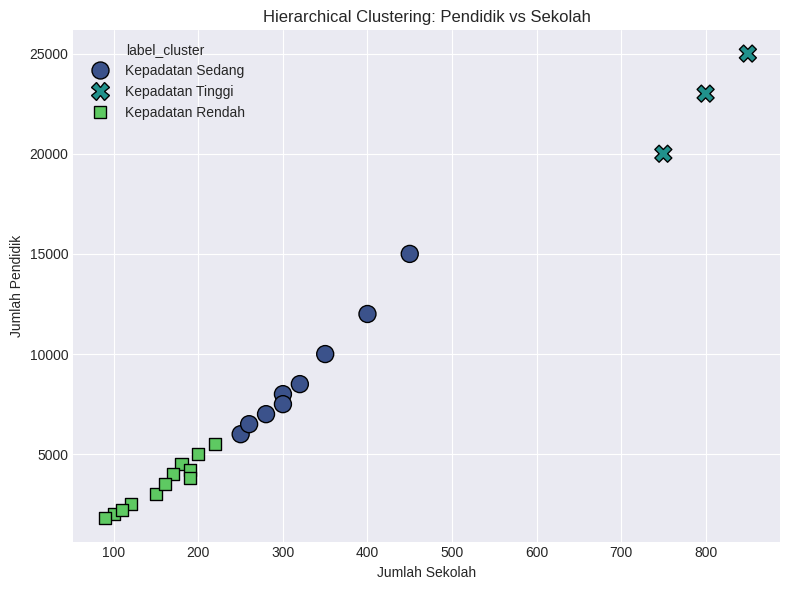

Hasil clustering disimpan ke: hasil_hierarchical_pendidik_sma_2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ANALISIS HIERARCHICAL CLUSTERING SELESAI


In [1]:
# Hierarchical Clustering: Jumlah Pendidik SMA 2024
# Analisis Pengelompokan Wilayah Berdasarkan Data Pendidik

# ==========================================
# 1. IMPORT LIBRARY
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
from google.colab import files

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ==========================================
# 2. LOAD DATA
# ==========================================
data_contoh = {
    'wilayah': ['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur',
                'Sumatera Utara', 'Banten', 'Sulawesi Selatan', 'Kalimantan Timur',
                'Papua', 'Maluku', 'Bali', 'NTB', 'Lampung', 'Riau',
                'Sulawesi Utara', 'Kalimantan Selatan', 'Jambi', 'Bengkulu',
                'Aceh', 'Sumatera Barat', 'NTT', 'Papua Barat', 'Gorontalo', 'Maluku Utara'],
    'jumlah_pendidik': [15000, 25000, 20000, 23000, 12000, 10000, 8000, 5000,
                        3000, 2500, 6000, 4500, 7000, 6500, 4000, 5500, 4200, 3500,
                        8500, 7500, 3800, 2000, 1800, 2200],
    'jumlah_sekolah': [450, 850, 750, 800, 400, 350, 300, 200,
                       150, 120, 250, 180, 280, 260, 170, 220, 190, 160,
                       320, 300, 190, 100, 90, 110]
}

df = pd.DataFrame(data_contoh)
df['rasio_guru_per_sekolah'] = df['jumlah_pendidik'] / df['jumlah_sekolah']

# ==========================================
# 3. PERSIAPAN DATA
# ==========================================
features = ['jumlah_pendidik', 'jumlah_sekolah']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 4. DENDROGRAM (MENENTUKAN JUMLAH CLUSTER)
# ==========================================
plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked,
           labels=df['wilayah'].values,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Wilayah')
plt.ylabel('Jarak')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ==========================================
# 5. IMPLEMENTASI HIERARCHICAL CLUSTERING
# ==========================================
optimal_cluster = 3
hc = AgglomerativeClustering(n_clusters=optimal_cluster, metric='euclidean', linkage='ward')
df['cluster'] = hc.fit_predict(X_scaled)

# ==========================================
# 6. EVALUASI CLUSTERING
# ==========================================
s_score = silhouette_score(X_scaled, df['cluster'])
db_score = davies_bouldin_score(X_scaled, df['cluster'])

print("="*60)
print("EVALUASI HIERARCHICAL CLUSTERING")
print("="*60)
print(f"Silhouette Score : {s_score:.3f}")
print(f"Davies-Bouldin Index : {db_score:.3f}")

# ==========================================
# 7. ANALISIS HASIL CLUSTERING
# ==========================================
cluster_labels = {}
avg_pendidik = df.groupby('cluster')['jumlah_pendidik'].mean()

for i in range(optimal_cluster):
    if avg_pendidik[i] > 15000:
        cluster_labels[i] = 'Kepadatan Tinggi'
    elif avg_pendidik[i] > 7000:
        cluster_labels[i] = 'Kepadatan Sedang'
    else:
        cluster_labels[i] = 'Kepadatan Rendah'

df['label_cluster'] = df['cluster'].map(cluster_labels)

summary = df.groupby('cluster').agg(
    wilayah=('wilayah', 'count'),
    pendidik_avg=('jumlah_pendidik', 'mean'),
    sekolah_avg=('jumlah_sekolah', 'mean'),
    rasio_avg=('rasio_guru_per_sekolah', 'mean')
).round(2).rename(index=cluster_labels)

print("\nRingkasan Statistik per Cluster:\n")
print(summary.to_markdown(numalign="left", stralign="left"))

print("\nWilayah dalam setiap Cluster:")
for i in range(optimal_cluster):
    wilayah_list = df[df['cluster'] == i]['wilayah'].values
    print(f"  • Cluster {i} ({cluster_labels[i]}): {', '.join(wilayah_list)}")

# ==========================================
# 8. VISUALISASI HASIL CLUSTERING
# ==========================================
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,
                x='jumlah_sekolah',
                y='jumlah_pendidik',
                hue='label_cluster',
                style='label_cluster',
                s=150,
                palette='viridis',
                edgecolor='black')
plt.title('Hierarchical Clustering: Pendidik vs Sekolah')
plt.xlabel('Jumlah Sekolah')
plt.ylabel('Jumlah Pendidik')
plt.tight_layout()
plt.show()

# ==========================================
# 9. EXPORT HASIL
# ==========================================
hasil_df = df[['wilayah', 'jumlah_pendidik', 'jumlah_sekolah',
               'rasio_guru_per_sekolah', 'cluster', 'label_cluster']].sort_values('cluster')

hasil_df.to_csv('hasil_hierarchical_pendidik_sma_2024.csv', index=False)
print("Hasil clustering disimpan ke: hasil_hierarchical_pendidik_sma_2024.csv")

try:
    files.download('hasil_hierarchical_pendidik_sma_2024.csv')
except:
    print("Auto-download hanya berfungsi di Google Colab")

print("="*60)
print("ANALISIS HIERARCHICAL CLUSTERING SELESAI")
print("="*60)